<a href="https://colab.research.google.com/github/oakfr/nn-training/blob/main/build_makemore_yay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving names.txt to names.txt


In [ ]:
words = open('names.txt','r').read().splitlines()

In [ ]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [ ]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

In [ ]:
sorted(b.items(), key=lambda x:-x[1])[:10]

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963)]

In [ ]:
import torch

In [ ]:
N = torch.zeros((28,28), dtype=torch.int32)

In [ ]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [ ]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1,ix2] += 1
    # b[bigram] = b.get(bigram, 0) + 1

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

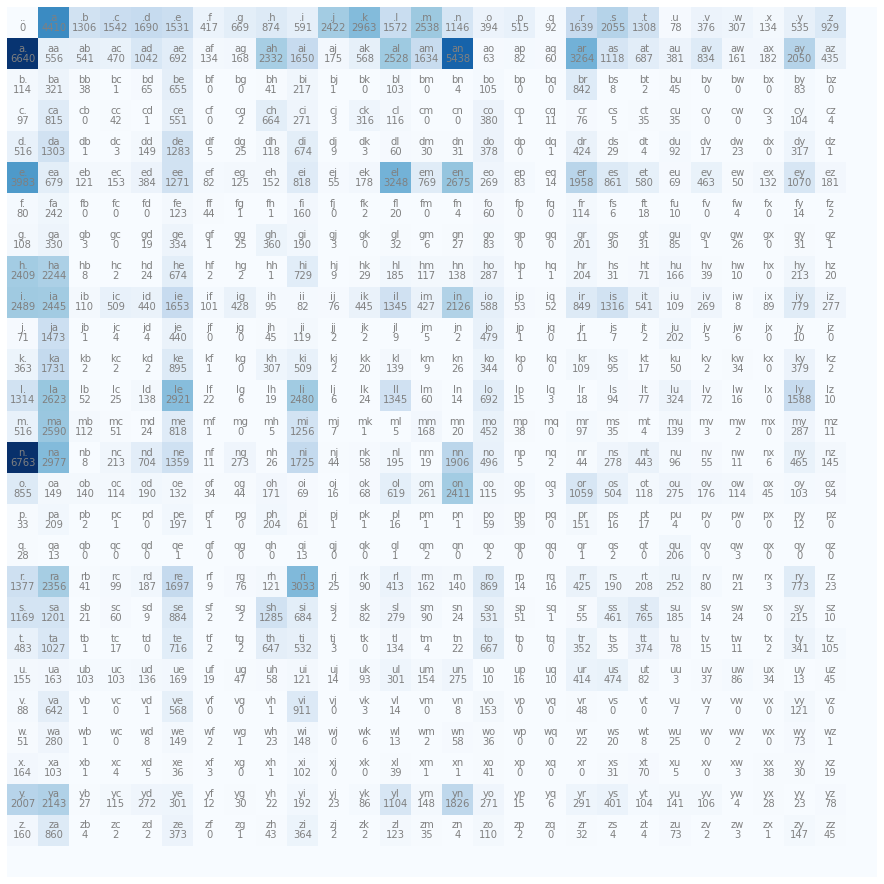

In [ ]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [ ]:
p = N[0].float()
p /= p.sum()

In [ ]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'm'

In [ ]:
P = (N+1).float()
P /= N.sum(1, keepdim=True)

In [ ]:
ix = 0
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  out = []
  while True:
    p = P[ix]
    # p = torch.ones(27) / 27

    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    if ix == 0:
      break
    out.append(itos[ix])
  print(''.join(out))


mor
axx
minaymoryles
kondlaisah
anchthizarie


In [ ]:
loglikelihood = .0
n = 0
#for w in words:
for w in ['andrejq']:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    loglikelihood += logprob
    n += 1
    print(f'{ch1},{ch2}: {prob:.4f} {logprob:.4f}')
print(f'log likelihood = {loglikelihood}')
nll = -loglikelihood
print(f'{nll=}')
print(f'{nll/n=}')


.,a: 0.1377 -1.9827
a,n: 0.1605 -1.8294
n,d: 0.0385 -3.2579
d,r: 0.0773 -2.5597
r,e: 0.1337 -2.0122
e,j: 0.0027 -5.8991
j,q: 0.0003 -7.9725
q,.: 0.1066 -2.2385
log likelihood = -27.751850128173828
nll=tensor(27.7519)
nll/n=tensor(3.4690)


In [ ]:
xs = torch.tensor([0, 5, 13, 13, 1])

In [ ]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes = 27).float()

In [ ]:
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
xenc.shape

torch.Size([5, 27])

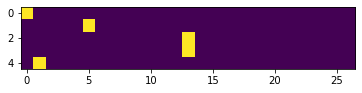

In [ ]:
plt.imshow(xenc)

In [ ]:
W = torch.randn((27,27))

In [ ]:
(xenc @ W).shape

torch.Size([5, 27])

In [ ]:
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(axis=1, keepdims=True)

In [ ]:
probs[0].sum()

tensor(1.)

In [ ]:
xs = torch.tensor([0, 5, 13, 13, 1])
ys = torch.tensor([5, 13, 13, 1, 0])

In [ ]:
# randomly initialize 27 neurons
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator = g, requires_grad=True)

In [ ]:
import torch.nn.functional as F
# forward pass
xenc = F.one_hot(xs, num_classes = 27).float()
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(axis=1, keepdims=True)
loss = -probs[torch.arange(5), ys].log().mean()

In [ ]:
W.grad = None # set gradient to zero
loss.backward()

In [ ]:
W.data += -0.1 * W.grad

In [ ]:
print(loss.item())

3.7492127418518066


In [ ]:
# create the dataset (bigram model)
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip (chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print(f'num examples = {num}')

# initialize the network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)




num examples = 228146


In [ ]:
# create the dataset (trigram model)
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2, ch3 in zip (chs, chs[1:], chs[2:]):
    #print(ch1,ch2,ch3)
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    xs.append([ix1,ix2])
    ys.append(ix3)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.shape[0]
print(f'num examples = {num}')

# initialize the network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27*2,27), generator=g, requires_grad=True)

num examples = 196113


In [ ]:
# split into train/dev/test
a = int(.8 * num)
b = int(.9 * num)
xs_train = xs[:a,:]
xs_dev = xs[a:b,:]
xs_test = xs[b:,:]
ys_train = ys[:a]
ys_dev = ys[a:b]
ys_test = ys[b:]
num_train = xs_train.shape[0]
num_dev = xs_dev.shape[0]
print(f'train samples = {num_train} / {num}')

train samples = 156890 / 196113


In [ ]:
import torch.nn.functional as F

In [ ]:
regs=[1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001]

for r in regs:

  # initialize the network
  g = torch.Generator().manual_seed(2147483647)
  W = torch.randn((27*2,27), generator=g, requires_grad=True)

  print(f"---------with smooting value of {r}-------------")

  train_loss = []
  dev_loss = []

  # gradient descent
  for k in range(100):

    # forward pass
    xenc = F.one_hot(xs_train, num_classes=27).float()
    xenc = xenc.view(num_train,-1)
    logits = xenc @ W # predict log counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    loss_train = -probs[torch.arange(num_train), ys_train].log().mean() + r * (W**2).mean()

    # backward pass
    W.grad = None
    loss_train.backward()

    # update
    W.data += -50 * W.grad

    # dev loss
    xdenc = F.one_hot(xs_dev, num_classes=27).float()
    xdenc = xdenc.view(num_dev,-1)
    logits = xdenc @ W # predict log counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    loss_dev = -probs[torch.arange(num_dev), ys_dev].log().mean()
    #print(f'train loss, dev loss = {loss_train.item()}, {loss_dev.item()}')
    train_loss.append(loss_train.item())
    dev_loss.append(loss_dev.item())

  print("Mean of training loss: ", sum(train_loss)/len(train_loss))
  print("Mean of dev set loss: ", sum(dev_loss)/len(dev_loss))
  print("----------------------------")


---------with smooting value of 1-------------
Mean of training loss:  2.605528769493103
Mean of dev set loss:  2.5709184527397158
----------------------------
---------with smooting value of 0.5-------------
Mean of training loss:  2.515159344673157
Mean of dev set loss:  2.5411646437644957
----------------------------
---------with smooting value of 0.1-------------
Mean of training loss:  2.3942275929450987
Mean of dev set loss:  2.53029333114624
----------------------------
---------with smooting value of 0.05-------------
Mean of training loss:  2.368103873729706
Mean of dev set loss:  2.533841755390167
----------------------------
---------with smooting value of 0.01-------------
Mean of training loss:  2.3415348505973816
Mean of dev set loss:  2.538955433368683
----------------------------
---------with smooting value of 0.005-------------
Mean of training loss:  2.337708020210266
Mean of dev set loss:  2.53977863073349
----------------------------
---------with smooting value o

In [ ]:
# finally, sample from the neural net model
import random
g = torch.Generator().manual_seed(2147483647)

for i in range(10):

  out = []
  ix = 0
  iy = random.randint(1, 26)
  
  while True:

    #p = P[ix]
   # a = torch.tensor([ix1,ix2]).sum(axis=1)
   # print(a)
    xenc = F.one_hot(torch.tensor([[ix,iy]]), num_classes=27).float()
    xenc = xenc.view(1,-1)
    #print(xenc)
    logits = xenc @ W
    counts = logits.exp()
    p = counts / counts.sum(1, keepdims=True)

    iz = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[iz])
    if iz == 0:
      break
    ix = iy
    iy = iz
  print(''.join(out))

RuntimeError: ignored